# Advanced MLP
- Advanced techniques for training neural networks
    - Weight Initialization
    - Nonlinearity (Activation function)
    - Optimizers
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

<table class="tfo-notebook-buttons" align="left">
   <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/text_classification_rnn.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import Sequential

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

import time

In [2]:
%matplotlib inline

## Load Dataset
- MNIST dataset
- source: http://yann.lecun.com/exdb/mnist/

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

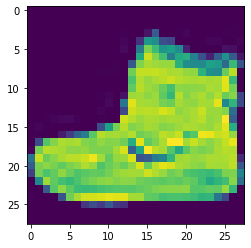

Label:  9


In [4]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

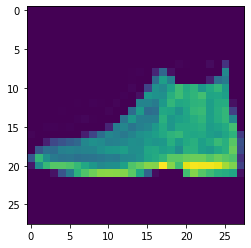

Label:  9


In [5]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [6]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [7]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


## 1. Basic MLP model
- Naive MLP model without any alterations

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [10]:
model = Sequential()
model.add(Dense(50, activation = 'sigmoid', input_shape=[784]))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])   

C:\Users\admin\anaconda3\envs\tf2-cpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [11]:
history = model.fit(X_train, y_train, validation_split = 0.3, batch_size=128, epochs = 100, verbose = 2)

Epoch 1/100
329/329 - 1s - loss: 2.4657 - accuracy: 0.0995 - val_loss: 2.3698 - val_accuracy: 0.1012
Epoch 2/100
329/329 - 0s - loss: 2.3393 - accuracy: 0.0995 - val_loss: 2.3136 - val_accuracy: 0.1012
Epoch 3/100
329/329 - 0s - loss: 2.3035 - accuracy: 0.0995 - val_loss: 2.2931 - val_accuracy: 0.1012
Epoch 4/100
329/329 - 0s - loss: 2.2886 - accuracy: 0.1065 - val_loss: 2.2832 - val_accuracy: 0.1289
Epoch 5/100
329/329 - 0s - loss: 2.2807 - accuracy: 0.1518 - val_loss: 2.2775 - val_accuracy: 0.1657
Epoch 6/100
329/329 - 0s - loss: 2.2755 - accuracy: 0.1848 - val_loss: 2.2731 - val_accuracy: 0.2133
Epoch 7/100
329/329 - 0s - loss: 2.2714 - accuracy: 0.2444 - val_loss: 2.2694 - val_accuracy: 0.2663
Epoch 8/100
329/329 - 0s - loss: 2.2678 - accuracy: 0.2908 - val_loss: 2.2659 - val_accuracy: 0.3291
Epoch 9/100
329/329 - 0s - loss: 2.2644 - accuracy: 0.3550 - val_loss: 2.2625 - val_accuracy: 0.3716
Epoch 10/100
329/329 - 0s - loss: 2.2610 - accuracy: 0.3825 - val_loss: 2.2592 - val_accura

Epoch 82/100
329/329 - 0s - loss: 1.6959 - accuracy: 0.5444 - val_loss: 1.6894 - val_accuracy: 0.5453
Epoch 83/100
329/329 - 0s - loss: 1.6833 - accuracy: 0.5473 - val_loss: 1.6768 - val_accuracy: 0.5451
Epoch 84/100
329/329 - 0s - loss: 1.6708 - accuracy: 0.5462 - val_loss: 1.6644 - val_accuracy: 0.5466
Epoch 85/100
329/329 - 0s - loss: 1.6584 - accuracy: 0.5493 - val_loss: 1.6519 - val_accuracy: 0.5498
Epoch 86/100
329/329 - 0s - loss: 1.6462 - accuracy: 0.5498 - val_loss: 1.6399 - val_accuracy: 0.5525
Epoch 87/100
329/329 - 0s - loss: 1.6341 - accuracy: 0.5521 - val_loss: 1.6279 - val_accuracy: 0.5551
Epoch 88/100
329/329 - 0s - loss: 1.6221 - accuracy: 0.5542 - val_loss: 1.6162 - val_accuracy: 0.5549
Epoch 89/100
329/329 - 0s - loss: 1.6103 - accuracy: 0.5571 - val_loss: 1.6045 - val_accuracy: 0.5567
Epoch 90/100
329/329 - 0s - loss: 1.5988 - accuracy: 0.5563 - val_loss: 1.5930 - val_accuracy: 0.5579
Epoch 91/100
329/329 - 0s - loss: 1.5874 - accuracy: 0.5587 - val_loss: 1.5818 - v

Training and validation accuracy seems to improve after around 60 epochs

In [12]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 721us/step - loss: 1.4961 - accuracy: 0.5664
Test accuracy:  0.5663999915122986


In [13]:

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'r', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'r', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'b', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    

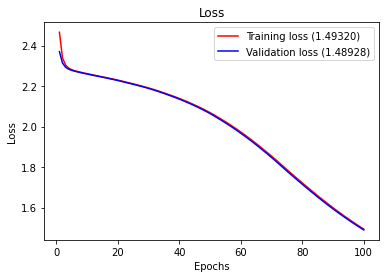

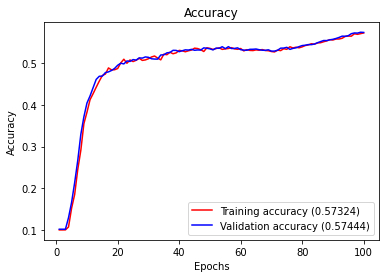

In [14]:
plot_history(history)

In [15]:
a1 = history.history['accuracy'][np.argmin(history.history['loss'])]
print('The accuracy of Basics MLP Model:', a1)

The accuracy of Basics MLP Model: 0.5732380747795105


## 2. Weight Initialization
- Changing weight initialization scheme can sometimes improve training of the model by preventing vanishing gradient problem up to some degree
- He normal or Xavier normal initialization schemes are SOTA at the moment
- Doc: https://keras.io/initializers/

In [16]:
model = Sequential()
  
model.add(Dense(50, activation = 'sigmoid', input_shape=[784], kernel_initializer='he_normal'))
model.add(Dense(50, activation = 'sigmoid', kernel_initializer='he_normal'))
model.add(Dense(50, activation = 'sigmoid', kernel_initializer='he_normal'))
model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])   

In [17]:
history = model.fit(X_train, y_train, validation_split = 0.3, batch_size=128, epochs =  100, verbose = 2)

Epoch 1/100
329/329 - 1s - loss: 2.5008 - accuracy: 0.0996 - val_loss: 2.3987 - val_accuracy: 0.1008
Epoch 2/100
329/329 - 0s - loss: 2.3517 - accuracy: 0.1014 - val_loss: 2.3134 - val_accuracy: 0.1126
Epoch 3/100
329/329 - 0s - loss: 2.2930 - accuracy: 0.1274 - val_loss: 2.2746 - val_accuracy: 0.1500
Epoch 4/100
329/329 - 0s - loss: 2.2642 - accuracy: 0.1666 - val_loss: 2.2543 - val_accuracy: 0.1962
Epoch 5/100
329/329 - 0s - loss: 2.2479 - accuracy: 0.2304 - val_loss: 2.2416 - val_accuracy: 0.2836
Epoch 6/100
329/329 - 0s - loss: 2.2368 - accuracy: 0.3295 - val_loss: 2.2323 - val_accuracy: 0.3658
Epoch 7/100
329/329 - 0s - loss: 2.2281 - accuracy: 0.3827 - val_loss: 2.2242 - val_accuracy: 0.3962
Epoch 8/100
329/329 - 0s - loss: 2.2204 - accuracy: 0.3963 - val_loss: 2.2168 - val_accuracy: 0.4066
Epoch 9/100
329/329 - 0s - loss: 2.2133 - accuracy: 0.4125 - val_loss: 2.2098 - val_accuracy: 0.4188
Epoch 10/100
329/329 - 0s - loss: 2.2066 - accuracy: 0.4140 - val_loss: 2.2030 - val_accura

Epoch 82/100
329/329 - 0s - loss: 1.4104 - accuracy: 0.6286 - val_loss: 1.4054 - val_accuracy: 0.6359
Epoch 83/100
329/329 - 0s - loss: 1.4011 - accuracy: 0.6350 - val_loss: 1.3968 - val_accuracy: 0.6375
Epoch 84/100
329/329 - 0s - loss: 1.3923 - accuracy: 0.6361 - val_loss: 1.3880 - val_accuracy: 0.6393
Epoch 85/100
329/329 - 0s - loss: 1.3836 - accuracy: 0.6366 - val_loss: 1.3795 - val_accuracy: 0.6414
Epoch 86/100
329/329 - 0s - loss: 1.3748 - accuracy: 0.6398 - val_loss: 1.3711 - val_accuracy: 0.6413
Epoch 87/100
329/329 - 0s - loss: 1.3664 - accuracy: 0.6397 - val_loss: 1.3624 - val_accuracy: 0.6443
Epoch 88/100
329/329 - 0s - loss: 1.3582 - accuracy: 0.6414 - val_loss: 1.3543 - val_accuracy: 0.6468
Epoch 89/100
329/329 - 0s - loss: 1.3501 - accuracy: 0.6433 - val_loss: 1.3464 - val_accuracy: 0.6504
Epoch 90/100
329/329 - 0s - loss: 1.3423 - accuracy: 0.6441 - val_loss: 1.3384 - val_accuracy: 0.6503
Epoch 91/100
329/329 - 0s - loss: 1.3343 - accuracy: 0.6480 - val_loss: 1.3306 - v

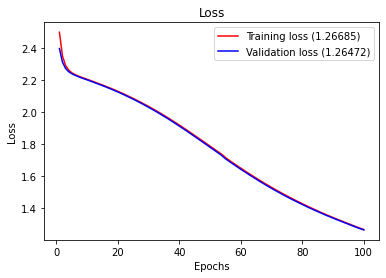

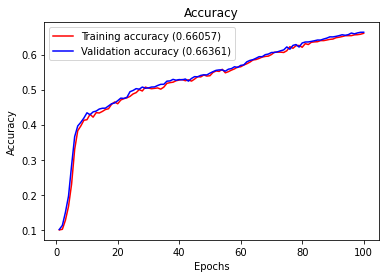

In [18]:
plot_history(history)

Training and validation accuracy seems to improve after around 60 epochs

In [19]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 734us/step - loss: 1.2739 - accuracy: 0.6500
Test accuracy:  0.6499999761581421


In [20]:
a2 = history.history['accuracy'][np.argmin(history.history['loss'])]
print('The accuracy of Weight initialization:', a2)

The accuracy of Weight initialization: 0.6605714559555054


## 3. Nonlinearity (Activation function)
- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tanh; try many of them!
    - **'relu'** (rectified linear unit) is one of the most popular ones
    - **'selu'** (scaled exponential linear unit) is one of the most recent ones
- Doc: https://keras.io/activations/

<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg" style="width: 400px"/>
<center> **Sigmoid Activation Function** </center>
<img src="http://cs231n.github.io/assets/nn1/relu.jpeg" style="width: 400px"/>
<center> **Relu Activation Function** </center>

In [21]:
model = Sequential()
model.add(Dense(50, activation = 'relu', input_shape=[784], kernel_initializer='he_normal'))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])   

In [22]:
history = model.fit(X_train, y_train, validation_split = 0.3, batch_size=128, epochs =  100, verbose = 2)

Epoch 1/100
329/329 - 1s - loss: 6.9268 - accuracy: 0.2201 - val_loss: 1.9964 - val_accuracy: 0.2799
Epoch 2/100
329/329 - 0s - loss: 1.8568 - accuracy: 0.2987 - val_loss: 2.1181 - val_accuracy: 0.2053
Epoch 3/100
329/329 - 0s - loss: 1.6539 - accuracy: 0.3849 - val_loss: 1.7991 - val_accuracy: 0.3323
Epoch 4/100
329/329 - 0s - loss: 1.5654 - accuracy: 0.4121 - val_loss: 1.6559 - val_accuracy: 0.4128
Epoch 5/100
329/329 - 0s - loss: 1.5264 - accuracy: 0.4239 - val_loss: 1.5370 - val_accuracy: 0.4268
Epoch 6/100
329/329 - 0s - loss: 1.4891 - accuracy: 0.4372 - val_loss: 1.6834 - val_accuracy: 0.3798
Epoch 7/100
329/329 - 0s - loss: 1.4632 - accuracy: 0.4466 - val_loss: 2.1542 - val_accuracy: 0.3092
Epoch 8/100
329/329 - 0s - loss: 1.4361 - accuracy: 0.4555 - val_loss: 1.4519 - val_accuracy: 0.4463
Epoch 9/100
329/329 - 0s - loss: 1.4060 - accuracy: 0.4614 - val_loss: 1.4117 - val_accuracy: 0.4716
Epoch 10/100
329/329 - 0s - loss: 1.3848 - accuracy: 0.4678 - val_loss: 1.4200 - val_accura

Epoch 82/100
329/329 - 0s - loss: 0.5115 - accuracy: 0.8208 - val_loss: 0.7372 - val_accuracy: 0.7095
Epoch 83/100
329/329 - 0s - loss: 0.5119 - accuracy: 0.8200 - val_loss: 0.6543 - val_accuracy: 0.7907
Epoch 84/100
329/329 - 0s - loss: 0.5094 - accuracy: 0.8222 - val_loss: 0.8029 - val_accuracy: 0.7601
Epoch 85/100
329/329 - 0s - loss: 0.5100 - accuracy: 0.8225 - val_loss: 0.6702 - val_accuracy: 0.7637
Epoch 86/100
329/329 - 0s - loss: 0.5063 - accuracy: 0.8225 - val_loss: 0.5918 - val_accuracy: 0.8060
Epoch 87/100
329/329 - 0s - loss: 0.5043 - accuracy: 0.8239 - val_loss: 0.5694 - val_accuracy: 0.8124
Epoch 88/100
329/329 - 0s - loss: 0.5037 - accuracy: 0.8249 - val_loss: 0.6312 - val_accuracy: 0.7790
Epoch 89/100
329/329 - 0s - loss: 0.5012 - accuracy: 0.8254 - val_loss: 0.5824 - val_accuracy: 0.8070
Epoch 90/100
329/329 - 0s - loss: 0.5008 - accuracy: 0.8240 - val_loss: 0.5771 - val_accuracy: 0.8078
Epoch 91/100
329/329 - 0s - loss: 0.4998 - accuracy: 0.8232 - val_loss: 0.6062 - v

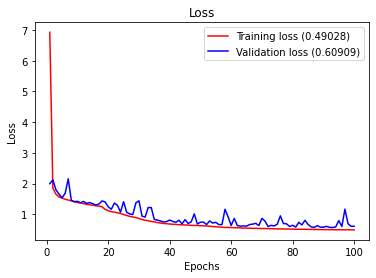

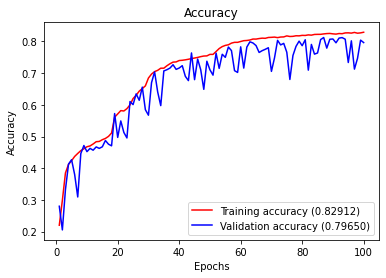

In [23]:
plot_history(history)

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [24]:
results = model.evaluate(X_test, y_test)

print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 721us/step - loss: 0.6308 - accuracy: 0.7923
Test accuracy:  0.7922999858856201


In [25]:
a3 = history.history['accuracy'][np.argmin(history.history['loss'])]
print('The accuracy of the SeLU is:', a3)

The accuracy of the SeLU is: 0.8291190266609192


## 4. Optimizers
- Many variants of SGD are proposed and employed nowadays
- One of the most popular ones are Adam (Adaptive Moment Estimation)
- Doc: https://keras.io/optimizers/

<img src="http://cs231n.github.io/assets/nn3/opt2.gif" style="width: 400px"/>
<br><center> **Relative convergence speed of different optimizers** </center></br>

In [26]:
model = Sequential()
model.add(Dense(50, activation = 'relu', input_shape=[784], kernel_initializer='he_normal'))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
 
sgd = optimizers.Adam(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])  

In [27]:
history = model.fit(X_train, y_train, validation_split = 0.3, batch_size=128, epochs =  100, verbose = 2)

Epoch 1/100
329/329 - 1s - loss: 5.6413 - accuracy: 0.6408 - val_loss: 1.6877 - val_accuracy: 0.6852
Epoch 2/100
329/329 - 0s - loss: 1.2134 - accuracy: 0.7315 - val_loss: 1.0174 - val_accuracy: 0.7383
Epoch 3/100
329/329 - 0s - loss: 0.8249 - accuracy: 0.7647 - val_loss: 0.7996 - val_accuracy: 0.7770
Epoch 4/100
329/329 - 0s - loss: 0.6641 - accuracy: 0.7918 - val_loss: 0.6733 - val_accuracy: 0.8004
Epoch 5/100
329/329 - 0s - loss: 0.6079 - accuracy: 0.8022 - val_loss: 0.6353 - val_accuracy: 0.7986
Epoch 6/100
329/329 - 0s - loss: 0.5440 - accuracy: 0.8170 - val_loss: 0.6250 - val_accuracy: 0.7937
Epoch 7/100
329/329 - 0s - loss: 0.5093 - accuracy: 0.8233 - val_loss: 0.5556 - val_accuracy: 0.8192
Epoch 8/100
329/329 - 0s - loss: 0.4931 - accuracy: 0.8278 - val_loss: 0.5669 - val_accuracy: 0.8188
Epoch 9/100
329/329 - 1s - loss: 0.4656 - accuracy: 0.8347 - val_loss: 0.5619 - val_accuracy: 0.8230
Epoch 10/100
329/329 - 1s - loss: 0.4559 - accuracy: 0.8375 - val_loss: 0.5896 - val_accura

Epoch 82/100
329/329 - 0s - loss: 0.2510 - accuracy: 0.9052 - val_loss: 0.4950 - val_accuracy: 0.8556
Epoch 83/100
329/329 - 0s - loss: 0.2521 - accuracy: 0.9065 - val_loss: 0.4425 - val_accuracy: 0.8716
Epoch 84/100
329/329 - 0s - loss: 0.2441 - accuracy: 0.9075 - val_loss: 0.4656 - val_accuracy: 0.8669
Epoch 85/100
329/329 - 0s - loss: 0.2428 - accuracy: 0.9078 - val_loss: 0.4514 - val_accuracy: 0.8724
Epoch 86/100
329/329 - 0s - loss: 0.2422 - accuracy: 0.9093 - val_loss: 0.5215 - val_accuracy: 0.8580
Epoch 87/100
329/329 - 0s - loss: 0.2491 - accuracy: 0.9068 - val_loss: 0.4621 - val_accuracy: 0.8693
Epoch 88/100
329/329 - 1s - loss: 0.2373 - accuracy: 0.9109 - val_loss: 0.5537 - val_accuracy: 0.8499
Epoch 89/100
329/329 - 0s - loss: 0.2317 - accuracy: 0.9128 - val_loss: 0.4826 - val_accuracy: 0.8723
Epoch 90/100
329/329 - 0s - loss: 0.2383 - accuracy: 0.9098 - val_loss: 0.4611 - val_accuracy: 0.8734
Epoch 91/100
329/329 - 0s - loss: 0.2319 - accuracy: 0.9127 - val_loss: 0.4703 - v

Training and validation accuracy improve instantaneously, but reach plateau after around 50 epochs

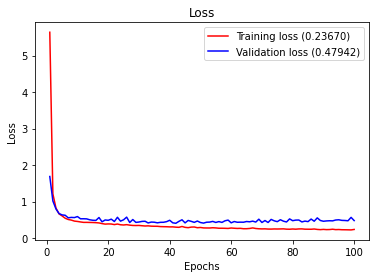

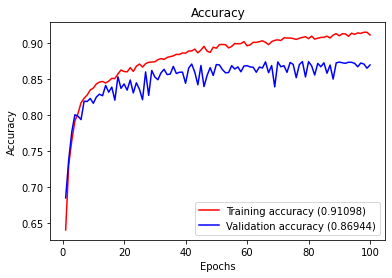

In [28]:
plot_history(history)

In [29]:
results = model.evaluate(X_test, y_test)

print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 982us/step - loss: 0.4984 - accuracy: 0.8592
Test accuracy:  0.8592000007629395


In [30]:
a4 = history.history['accuracy'][np.argmin(history.history['loss'])]
print('The accuracy of the Adam is:', a4)

The accuracy of the Adam is: 0.9147857427597046


## 5. Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/optimizers/

<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [31]:
from keras.layers import BatchNormalization

In [32]:
model = Sequential()

model.add(Dense(50, activation = 'relu', input_shape=[784], kernel_initializer='he_normal'))
model.add(BatchNormalization())  
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())  
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())  
model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

sgd = optimizers.Adam(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy']) 

In [33]:
history = model.fit(X_train, y_train, validation_split = 0.3, batch_size=128, epochs = 100, verbose = 2)

Epoch 1/100
329/329 - 1s - loss: 0.6167 - accuracy: 0.7925 - val_loss: 0.4545 - val_accuracy: 0.8397
Epoch 2/100
329/329 - 1s - loss: 0.3974 - accuracy: 0.8584 - val_loss: 0.4479 - val_accuracy: 0.8347
Epoch 3/100
329/329 - 1s - loss: 0.3583 - accuracy: 0.8687 - val_loss: 0.4085 - val_accuracy: 0.8565
Epoch 4/100
329/329 - 1s - loss: 0.3325 - accuracy: 0.8794 - val_loss: 0.3943 - val_accuracy: 0.8546
Epoch 5/100
329/329 - 1s - loss: 0.3104 - accuracy: 0.8870 - val_loss: 0.4079 - val_accuracy: 0.8588
Epoch 6/100
329/329 - 1s - loss: 0.2999 - accuracy: 0.8886 - val_loss: 0.3864 - val_accuracy: 0.8577
Epoch 7/100
329/329 - 1s - loss: 0.2873 - accuracy: 0.8940 - val_loss: 0.3783 - val_accuracy: 0.8632
Epoch 8/100
329/329 - 1s - loss: 0.2807 - accuracy: 0.8967 - val_loss: 0.3684 - val_accuracy: 0.8672
Epoch 9/100
329/329 - 1s - loss: 0.2699 - accuracy: 0.9006 - val_loss: 0.3498 - val_accuracy: 0.8769
Epoch 10/100
329/329 - 1s - loss: 0.2571 - accuracy: 0.9053 - val_loss: 0.3785 - val_accura

Epoch 82/100
329/329 - 1s - loss: 0.0826 - accuracy: 0.9690 - val_loss: 0.5613 - val_accuracy: 0.8750
Epoch 83/100
329/329 - 1s - loss: 0.0876 - accuracy: 0.9675 - val_loss: 0.5725 - val_accuracy: 0.8772
Epoch 84/100
329/329 - 1s - loss: 0.0923 - accuracy: 0.9655 - val_loss: 0.5758 - val_accuracy: 0.8593
Epoch 85/100
329/329 - 1s - loss: 0.0849 - accuracy: 0.9688 - val_loss: 0.5594 - val_accuracy: 0.8719
Epoch 86/100
329/329 - 1s - loss: 0.0821 - accuracy: 0.9701 - val_loss: 0.6395 - val_accuracy: 0.8660
Epoch 87/100
329/329 - 1s - loss: 0.0864 - accuracy: 0.9686 - val_loss: 0.5727 - val_accuracy: 0.8716
Epoch 88/100
329/329 - 1s - loss: 0.0873 - accuracy: 0.9671 - val_loss: 0.5896 - val_accuracy: 0.8739
Epoch 89/100
329/329 - 1s - loss: 0.0833 - accuracy: 0.9693 - val_loss: 0.5763 - val_accuracy: 0.8768
Epoch 90/100
329/329 - 1s - loss: 0.0817 - accuracy: 0.9695 - val_loss: 0.5960 - val_accuracy: 0.8636
Epoch 91/100
329/329 - 1s - loss: 0.0749 - accuracy: 0.9717 - val_loss: 0.5895 - v

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

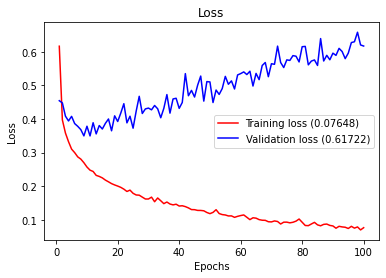

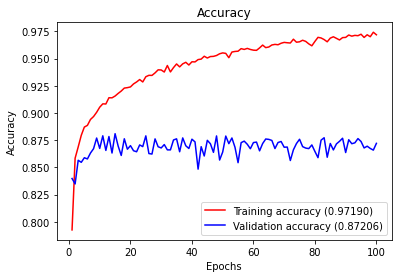

In [34]:
plot_history(history)

In [35]:
results = model.evaluate(X_test, y_test)

print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 999us/step - loss: 0.6632 - accuracy: 0.8669
Test accuracy:  0.8669000267982483


In [36]:
a5 = history.history['accuracy'][np.argmin(history.history['loss'])]
print('The accuracy of the BatchNormalization is:', a5)

The accuracy of the BatchNormalization is: 0.9742380976676941


## 6. Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

<img src="https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-62-638.jpg?cb=1430740006" style="width: 500px"/>

In [37]:
from keras.layers import Dropout

In [38]:
model = Sequential()

model.add(Dense(50, activation = 'relu', input_shape=[784], kernel_initializer='he_normal'))
model.add(BatchNormalization())  
model.add(Dropout(0.2))  
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())  
model.add(Dropout(0.2))  
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())  
model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

sgd = optimizers.Adam(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy']) 

In [39]:
history = model.fit(X_train, y_train, validation_split = 0.3, batch_size=128, epochs = 100, verbose = 2)

Epoch 1/100
329/329 - 1s - loss: 0.7919 - accuracy: 0.7315 - val_loss: 0.4729 - val_accuracy: 0.8313
Epoch 2/100
329/329 - 1s - loss: 0.5113 - accuracy: 0.8173 - val_loss: 0.4353 - val_accuracy: 0.8402
Epoch 3/100
329/329 - 1s - loss: 0.4638 - accuracy: 0.8344 - val_loss: 0.3974 - val_accuracy: 0.8548
Epoch 4/100
329/329 - 1s - loss: 0.4379 - accuracy: 0.8434 - val_loss: 0.4015 - val_accuracy: 0.8546
Epoch 5/100
329/329 - 1s - loss: 0.4222 - accuracy: 0.8475 - val_loss: 0.3933 - val_accuracy: 0.8575
Epoch 6/100
329/329 - 1s - loss: 0.4043 - accuracy: 0.8558 - val_loss: 0.3664 - val_accuracy: 0.8665
Epoch 7/100
329/329 - 1s - loss: 0.3929 - accuracy: 0.8579 - val_loss: 0.3891 - val_accuracy: 0.8589
Epoch 8/100
329/329 - 1s - loss: 0.3884 - accuracy: 0.8598 - val_loss: 0.3541 - val_accuracy: 0.8701
Epoch 9/100
329/329 - 1s - loss: 0.3754 - accuracy: 0.8640 - val_loss: 0.3544 - val_accuracy: 0.8724
Epoch 10/100
329/329 - 1s - loss: 0.3628 - accuracy: 0.8685 - val_loss: 0.3800 - val_accura

Epoch 82/100
329/329 - 1s - loss: 0.2462 - accuracy: 0.9093 - val_loss: 0.3688 - val_accuracy: 0.8756
Epoch 83/100
329/329 - 1s - loss: 0.2454 - accuracy: 0.9080 - val_loss: 0.3512 - val_accuracy: 0.8834
Epoch 84/100
329/329 - 1s - loss: 0.2458 - accuracy: 0.9070 - val_loss: 0.3445 - val_accuracy: 0.8803
Epoch 85/100
329/329 - 1s - loss: 0.2442 - accuracy: 0.9084 - val_loss: 0.3517 - val_accuracy: 0.8829
Epoch 86/100
329/329 - 1s - loss: 0.2440 - accuracy: 0.9077 - val_loss: 0.3518 - val_accuracy: 0.8779
Epoch 87/100
329/329 - 1s - loss: 0.2410 - accuracy: 0.9087 - val_loss: 0.3538 - val_accuracy: 0.8812
Epoch 88/100
329/329 - 1s - loss: 0.2476 - accuracy: 0.9083 - val_loss: 0.3525 - val_accuracy: 0.8825
Epoch 89/100
329/329 - 1s - loss: 0.2424 - accuracy: 0.9086 - val_loss: 0.3458 - val_accuracy: 0.8816
Epoch 90/100
329/329 - 1s - loss: 0.2433 - accuracy: 0.9079 - val_loss: 0.3547 - val_accuracy: 0.8826
Epoch 91/100
329/329 - 1s - loss: 0.2408 - accuracy: 0.9107 - val_loss: 0.3444 - v

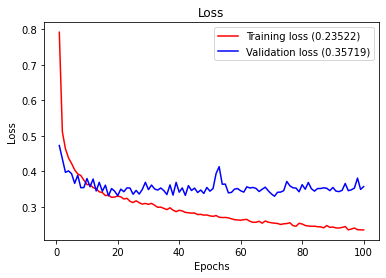

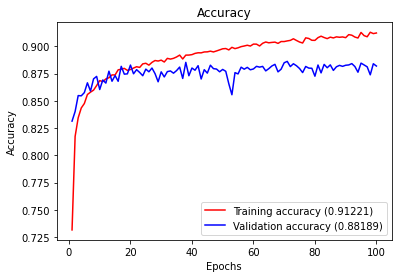

In [40]:
plot_history(history)

Validation results does not improve since it did not show signs of overfitting, yet.
<br> Hence, the key takeaway message is that apply dropout when you see a signal of overfitting.

In [41]:
results = model.evaluate(X_test, y_test)

print('Test accuracy: ', results[1])

313/313 [==============================] - 0s 799us/step - loss: 0.3865 - accuracy: 0.8747
Test accuracy:  0.8747000098228455


In [42]:
a6 = history.history['accuracy'][np.argmin(history.history['loss'])]
print('The accuracy of the DropOut is:', a6)

The accuracy of the DropOut is: 0.9122142791748047


In [43]:
models = pd.DataFrame({
    'Model': ['1)DNN Basic',  '2)Weight Initialization(He)', '3)Activation ReLU(ReLU)',
              '4)Optimization Adam', '5)BatchNormalization','6)DropOut'],
    'Score': [a1, a2, a3, a4, a5, a6]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,5)BatchNormalization,0.974238
3,4)Optimization Adam,0.914786
5,6)DropOut,0.912214
2,3)Activation ReLU(ReLU),0.829119
1,2)Weight Initialization(He),0.660571
0,1)DNN Basic,0.573238
